In [1]:
# Ignore user warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

### Load relevant packages

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.api         as sm
import statsmodels.formula.api as smf
import scipy
from scipy import stats

import os
from sklearn.model_selection import train_test_split
# This statement allow to display plot without asking to 
%matplotlib inline

# always make it pretty 
plt.style.use('ggplot')

In [45]:
import esda
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
from shapely.geometry import Point
import folium
import branca
import psycopg2
import sqlalchemy
import re
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [66]:
dict_types = { # indicate categorical variables
        'suelo': 'category',
#         'B': 'category',
#         'C': 'category',
#         'D': 'category',
#         'E': 'category',
#         'F': 'category',
#         'G': 'category',
#         'car_value': 'category',
#         'state': 'category'
     }
df = pd.read_csv('ofertas_v1_1.csv',dtype={'LOTCODIGO':'str'}

)
df.drop(columns=['Unnamed: 0'], inplace = True)
# df.drop(columns=['Unnamed: 0.1'], inplace = True)

/home/rcamilo/anaconda3/envs/geospatial/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
df

,OFT_CODIGO,LOTCODIGO,NOMBRE_BARRIO,OFT_TIPO_INMUEBLE,OFT_TIPO_NORMA_JURIDICA,OIC_AREA_TERRENO,OIC_AREA_CONSTRUCCION,OIC_VALOR_ADM,OIC_VALOR_ANEXOS,OIA_TIENE_ASCENSOR,OIA_CANT_GARAJES,VFventa2020,CODIGO_CON,CODIGO_RES,X,Y,D_PARK,D_HIGHWAY,D_BIKEWAY,D_SSF,D_MUS,D_LIB,D_SITP,D_TM,D_P_TM,D_GY,D_IES,D_BOM,D_COL,D_IPS,DM_BIKEWAY,DM_BOM,DM_COL,DM_GY,DM_HIGHWAY,DM_IES,DM_IPS,DM_LIB,DM_MUS,DM_PARK,DM_P_TM,DM_SITP,DM_SSF,DM_TM,LOCCODIGO,LOCNOMBRE,Z,barmanpre,preczhf,suelo,actividad,tratamiento_urb,topografia,serpub,serpub_tipo,serpub_especif,via,clase_via,estado_via,influencia_via,actividad_economica,actividad_economica_tipo,tipo_segun_actividad,MANZANA_ID,CP_TERR_AR,AVALUO_COM,AVALUO_CAT,log(VFventa2020)
0,338319,9114036002,GILMAR,Apartamento,PH,1.0,154.30,400000.0,0.0,NO,2,8.385538e+08,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.547189
1,338320,9114036002,GILMAR,Apartamento,PH,1.0,154.30,400000.0,0.0,NO,2,8.980613e+08,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.615749
2,338321,8312005016,ESPARTILLAL,Oficina,PH,1.0,77.63,692000.0,0.0,SI,2,5.576739e+08,1.0,6002.0,1.002157e+06,1.007369e+06,176.040380,80.395866,262.720201,2535.917825,425.246626,2842.550861,58.876229,335.001609,7184.778515,1734.626853,105.485195,1691.440905,491.935033,6.279318,310.614444,2088.308464,675.004922,2297.591306,141.837730,184.288849,24.179026,3660.671996,622.041676,200.283583,8112.431909,129.976952,3208.664478,582.411375,2.0,CHAPINERO,2565.440497,8312005016,6452315152122,6,45,23,1,51,5,1,521,5,2,1,22,2,2,8312005,N,5800000.0,4930000.0,20.139285
3,338323,9124001039,PUENTE LARGO,Apartamento,PH,1.0,94.50,382000.0,0.0,NO,2,4.279725e+08,1.0,3002.0,1.001184e+06,1.011152e+06,39.862132,197.631985,217.813959,3511.786174,2548.295866,2879.444435,201.146286,449.852551,5006.047133,3663.701858,1150.395691,2954.407099,324.595001,155.957758,306.796430,3338.924183,441.317970,4764.539245,288.838433,1391.180606,269.738273,3263.703055,3048.418357,79.298390,6021.974309,422.752810,4345.943404,637.196995,11.0,SUBA,2558.471054,9124001039,6222115152115,6,22,21,1,51,5,1,521,5,2,1,15,1,5,9124001,P,3910586.0,2952398.0,19.874570
4,338324,8412054021,SANTA BIBIANA,Apartamento,PH,1.0,128.60,650000.0,0.0,NO,2,1.051021e+09,1.0,5003.0,1.002798e+06,1.010680e+06,109.315253,124.598558,4.642318,3678.832326,1879.858494,4211.971813,142.811580,413.261916,6693.263262,3967.405952,103.326581,4075.981245,279.132676,102.726665,38.278663,4742.141015,560.686525,4552.293612,140.984048,115.379418,163.595361,5387.519156,2594.299510,214.594010,8352.744279,260.115731,4587.553062,2118.277891,1.0,USAQUEN,2552.554726,8412054021,6222215153215,6,22,22,1,51,5,1,532,5,3,2,15,1,5,8412054,P,5457414.0,4287253.0,20.773028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86966,519334,1110010004,SAN JAVIER,Casa,NPH,202.0,408.20,0.0,0.0,NaN,1,8.354650e+08,0.0,0.0,9.992487e+05,9.981240e+05,61.556672,196.691247,667.387349,402.819567,510.868103,2145.717130,186.986912,697.0073

In [12]:
df['OFT_TIPO_INMUEBLE'] = df['OFT_TIPO_INMUEBLE'].apply(lambda x: x.capitalize())

In [13]:
df['OFT_TIPO_INMUEBLE'].unique() 

array(['Apartamento', 'Oficina', 'Casa uso mixto', 'Casa', 'Lote',
       'Casa lote', 'Edificio', 'Bodega', 'Local', 'Edificio comercial',
       'Garaje', 'Inmueble comercial', 'Deposito',
       'Parqueadero - lavaautos', 'Industria', 'Institucional',
       'Parqueadero', 'Dotacional', 'Apartaestudio', 'Consultorio',
       'Casa comercial', 'Bodega comercial', 'Consultotio',
       'Casa residencial', 'Casa campestre', 'Casa bodega', 'Casa/bodega',
       'Cas uso mixto', 'Residencias-hotel', 'Casa mixta',
       'Casa de uso mixto', 'Parqueadero - lava autos', 'Depósito'],
      dtype=object)

In [18]:
df.loc[df['OFT_TIPO_INMUEBLE']=='Cas uso mixto','OFT_TIPO_INMUEBLE'] = 'Casa uso mixto'
df.loc[df['OFT_TIPO_INMUEBLE']=='Casa de uso mixto','OFT_TIPO_INMUEBLE'] = 'Casa uso mixto'
df.loc[df['OFT_TIPO_INMUEBLE']=='Casa mixta','OFT_TIPO_INMUEBLE'] = 'Casa uso mixto'
df['OFT_TIPO_INMUEBLE'].unique() 

array(['Apartamento', 'Oficina', 'Casa uso mixto', 'Casa', 'Lote',
       'Casa lote', 'Edificio', 'Bodega', 'Local', 'Edificio comercial',
       'Garaje', 'Inmueble comercial', 'Deposito',
       'Parqueadero - lava autos', 'Industria', 'Institucional',
       'Parqueadero', 'Dotacional', 'Apartaestudio', 'Consultorio',
       'Casa comercial', 'Bodega comercial', 'Casa residencial',
       'Casa campestre', 'Casa bodega', 'Residencias-hotel', 'Depósito'],
      dtype=object)

In [15]:
df.loc[df['OFT_TIPO_INMUEBLE']=='Casa/bodega','OFT_TIPO_INMUEBLE'] = 'Casa bodega'
df['OFT_TIPO_INMUEBLE'].unique() 

array(['Apartamento', 'Oficina', 'Casa uso mixto', 'Casa', 'Lote',
       'Casa lote', 'Edificio', 'Bodega', 'Local', 'Edificio comercial',
       'Garaje', 'Inmueble comercial', 'Deposito',
       'Parqueadero - lavaautos', 'Industria', 'Institucional',
       'Parqueadero', 'Dotacional', 'Apartaestudio', 'Consultorio',
       'Casa comercial', 'Bodega comercial', 'Consultotio',
       'Casa residencial', 'Casa campestre', 'Casa bodega',
       'Residencias-hotel', 'Casa mixta', 'Parqueadero - lava autos',
       'Depósito'], dtype=object)

In [16]:
df.loc[df['OFT_TIPO_INMUEBLE']=='Parqueadero - lavaautos','OFT_TIPO_INMUEBLE'] = 'Parqueadero - lava autos'
df['OFT_TIPO_INMUEBLE'].unique() 

array(['Apartamento', 'Oficina', 'Casa uso mixto', 'Casa', 'Lote',
       'Casa lote', 'Edificio', 'Bodega', 'Local', 'Edificio comercial',
       'Garaje', 'Inmueble comercial', 'Deposito',
       'Parqueadero - lava autos', 'Industria', 'Institucional',
       'Parqueadero', 'Dotacional', 'Apartaestudio', 'Consultorio',
       'Casa comercial', 'Bodega comercial', 'Consultotio',
       'Casa residencial', 'Casa campestre', 'Casa bodega',
       'Residencias-hotel', 'Casa mixta', 'Depósito'], dtype=object)

In [17]:
df.loc[df['OFT_TIPO_INMUEBLE']=='Consultotio','OFT_TIPO_INMUEBLE'] = 'Consultorio'
df['OFT_TIPO_INMUEBLE'].unique() 

array(['Apartamento', 'Oficina', 'Casa uso mixto', 'Casa', 'Lote',
       'Casa lote', 'Edificio', 'Bodega', 'Local', 'Edificio comercial',
       'Garaje', 'Inmueble comercial', 'Deposito',
       'Parqueadero - lava autos', 'Industria', 'Institucional',
       'Parqueadero', 'Dotacional', 'Apartaestudio', 'Consultorio',
       'Casa comercial', 'Bodega comercial', 'Casa residencial',
       'Casa campestre', 'Casa bodega', 'Residencias-hotel', 'Casa mixta',
       'Depósito'], dtype=object)

In [21]:
df['OFT_TIPO_INMUEBLE'].value_counts() 

Apartamento                 50553
Casa                        23799
Casa uso mixto               3981
Lote                         1835
Oficina                      1626
Local                        1570
Bodega                       1423
Edificio                      619
Casa lote                     331
Apartaestudio                 327
Parqueadero                   301
Inmueble comercial            188
Deposito                      187
Garaje                        101
Dotacional                     38
Consultorio                    31
Industria                      17
Edificio comercial             15
Parqueadero - lava autos        8
Depósito                        4
Bodega comercial                4
Casa comercial                  4
Casa bodega                     4
Casa residencial                2
Residencias-hotel               1
Institucional                   1
Casa campestre                  1
Name: OFT_TIPO_INMUEBLE, dtype: int64

In [24]:
df['OFT_TIPO_INMUEBLE'].value_counts() 

Index(['OFT_CODIGO', 'LOTCODIGO', 'NOMBRE_BARRIO', 'OFT_TIPO_INMUEBLE',
       'OFT_TIPO_NORMA_JURIDICA', 'OIC_AREA_TERRENO', 'OIC_AREA_CONSTRUCCION',
       'OIC_VALOR_ADM', 'OIC_VALOR_ANEXOS', 'OIA_TIENE_ASCENSOR',
       'OIA_CANT_GARAJES', 'VFventa2020', 'CODIGO_CON', 'CODIGO_RES', 'X', 'Y',
       'D_PARK', 'D_HIGHWAY', 'D_BIKEWAY', 'D_SSF', 'D_MUS', 'D_LIB', 'D_SITP',
       'D_TM', 'D_P_TM', 'D_GY', 'D_IES', 'D_BOM', 'D_COL', 'D_IPS',
       'DM_BIKEWAY', 'DM_BOM', 'DM_COL', 'DM_GY', 'DM_HIGHWAY', 'DM_IES',
       'DM_IPS', 'DM_LIB', 'DM_MUS', 'DM_PARK', 'DM_P_TM', 'DM_SITP', 'DM_SSF',
       'DM_TM', 'LOCCODIGO', 'LOCNOMBRE', 'Z', 'barmanpre', 'preczhf', 'suelo',
       'actividad', 'tratamiento_urb', 'topografia', 'serpub', 'serpub_tipo',
       'serpub_especif', 'via', 'clase_via', 'estado_via', 'influencia_via',
       'actividad_economica', 'actividad_economica_tipo',
       'tipo_segun_actividad', 'MANZANA_ID', 'CP_TERR_AR', 'AVALUO_COM',
       'AVALUO_CAT'],
      dtype=

<AxesSubplot:xlabel='actividad_economica_tipo', ylabel='VFventa2020'>

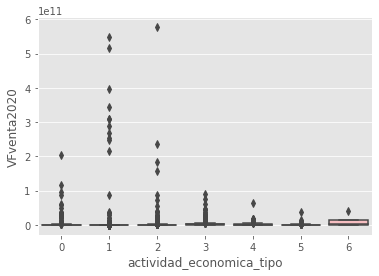

In [26]:
sns.boxplot(x = 'actividad_economica_tipo', y = 'VFventa2020', data = df)

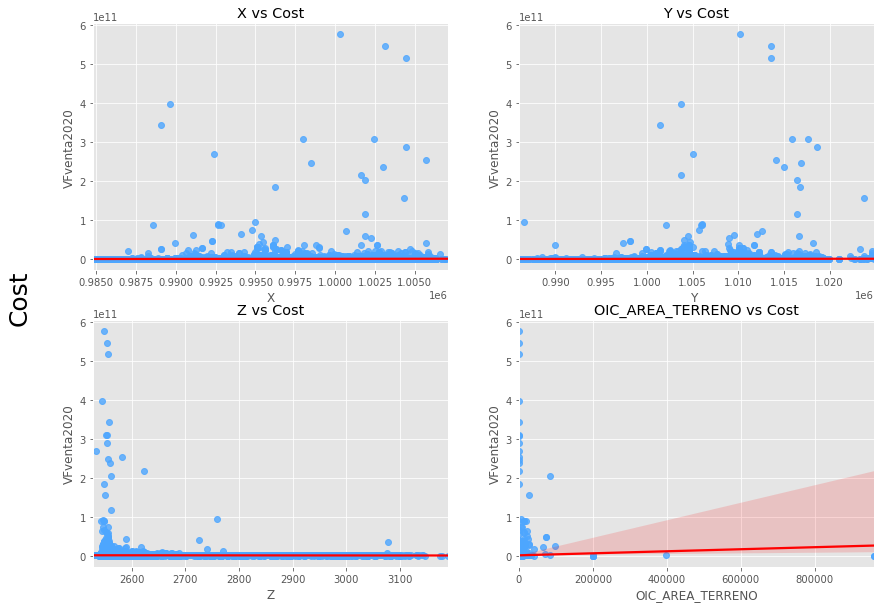

In [29]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
fig, axs = plt.subplots(2, 2)
fig.text(0.04, 0.5, 'Cost', va='center', rotation='vertical',fontsize=25)


sns.regplot(x = 'X', y = 'VFventa2020', data = df,ax=axs[0,0],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
axs[0,0].set_title('X vs Cost')
axs[0,0].set_xlabel('X')#,fontweight ='bold',fontsize=15)

sns.regplot(x = 'Y', y = 'VFventa2020', data = df,ax=axs[0,1],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
axs[0,1].set_title('Y vs Cost')
axs[0,1].set_xlabel('Y ')

sns.regplot(x = 'Z', y = 'VFventa2020', data = df,ax=axs[1,0],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
axs[1,0].set_title('Z vs Cost')
axs[1,0].set_xlabel('Z')

sns.regplot(x='OIC_AREA_TERRENO', y = 'VFventa2020', data = df,ax=axs[1,1],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
# sns.boxplot(x='duration_previous', y = 'cost', data = df,ax=axs[1,1]) 
axs[1,1].set_title('OIC_AREA_TERRENO vs Cost')
axs[1,1].set_xlabel('OIC_AREA_TERRENO');

In [37]:
df['log(VFventa2020)'] = np.log(df['VFventa2020'])

In [39]:
df.to_csv('ofertas_v1_1.csv')

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
fig, axs = plt.subplots(2, 2)
fig.text(0.04, 0.5, 'Cost', va='center', rotation='vertical',fontsize=25)


sns.regplot(x = 'X', y = 'VFventa2020', data = df,ax=axs[0,0],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
axs[0,0].set_title('X vs Cost')
axs[0,0].set_xlabel('X')#,fontweight ='bold',fontsize=15)

sns.regplot(x = 'Y', y = 'VFventa2020', data = df,ax=axs[0,1],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
axs[0,1].set_title('Y vs Cost')
axs[0,1].set_xlabel('Y ')

sns.regplot(x = 'Z', y = 'VFventa2020', data = df,ax=axs[1,0],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
axs[1,0].set_title('Z vs Cost')
axs[1,0].set_xlabel('Z')

sns.regplot(x='OIC_AREA_TERRENO', y = 'VFventa2020', data = df,ax=axs[1,1],scatter_kws={'color':'#4DA6FF'}, line_kws={'color':'red'})
# sns.boxplot(x='duration_previous', y = 'cost', data = df,ax=axs[1,1]) 
axs[1,1].set_title('OIC_AREA_TERRENO vs Cost')
axs[1,1].set_xlabel('OIC_AREA_TERRENO');

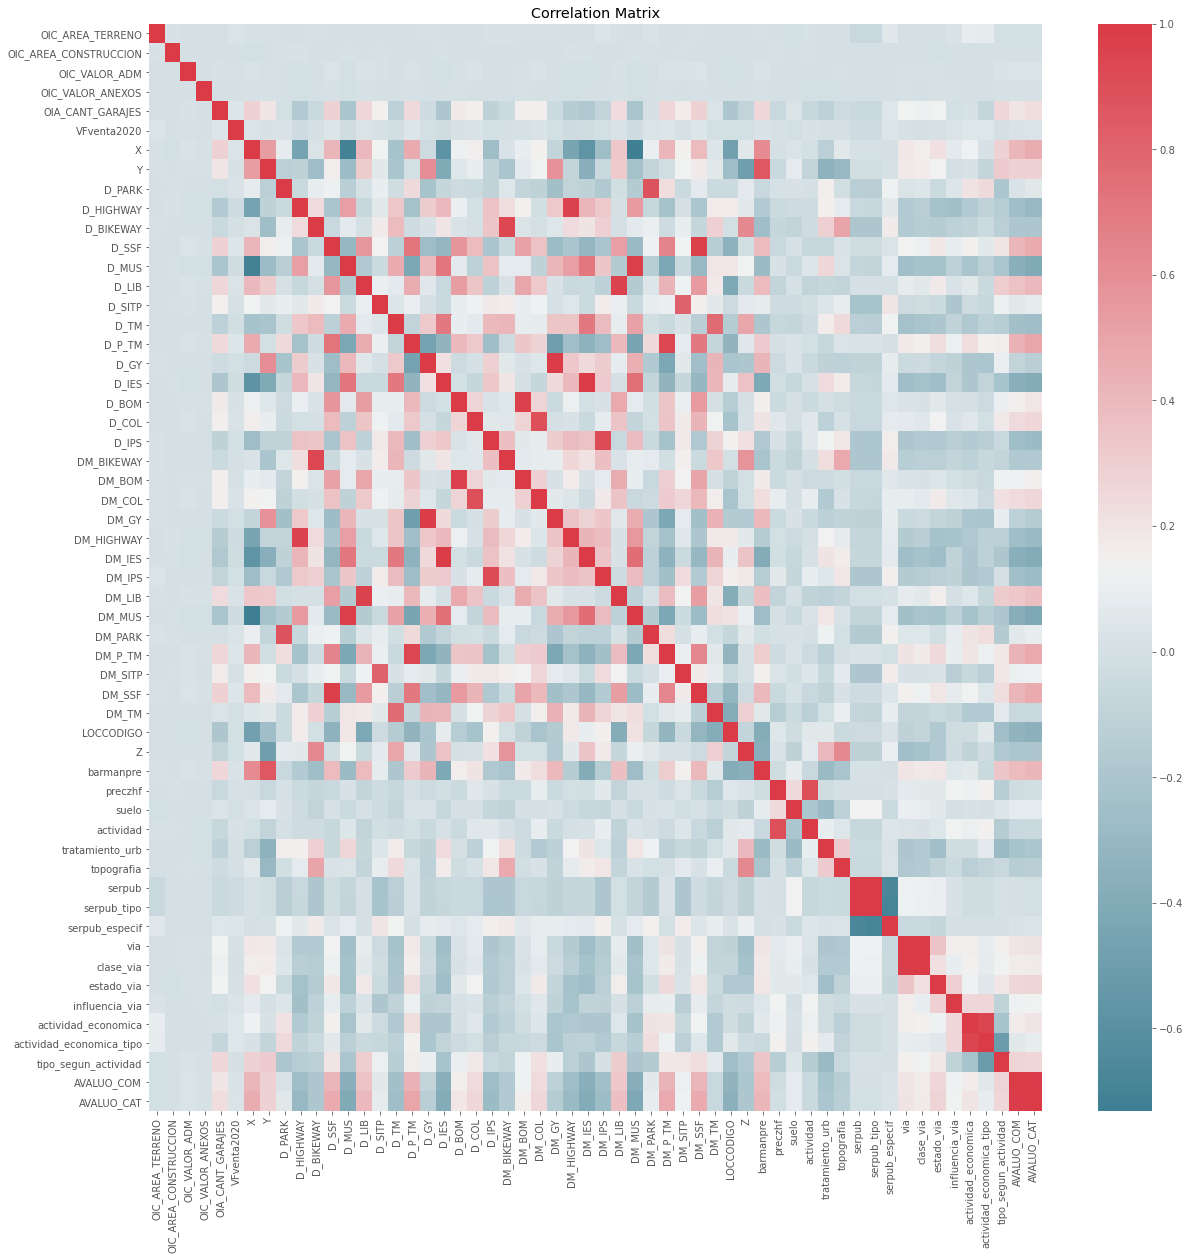

In [34]:
rcParams['figure.figsize'] = 20, 20
corr_mat  = df[[i for i in list(df) if i not in ['OFT_CODIGO','LOT_CODIGO','CODIGO_CON','CODIGO_RES','LOTCODIGO','MANZANA_ID']]].corr()
sns.heatmap(corr_mat,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix");

In [44]:
# formula_model_region_no_oldest = 'cost ~' +' + '.join([i for i in list(train) if i not in ['cost','state','C','D','group_size','risk_factor','age_oldest']])#+' + age_youngest**2 +car_age**2+ age_youngest*car_value'
model_region_no_oldest = smf.ols("np.log(VFventa2020) ~ X+Y+Z", data = df).fit()
print(model_region_no_oldest.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(VFventa2020)   R-squared:                       0.191
Model:                             OLS   Adj. R-squared:                  0.191
Method:                  Least Squares   F-statistic:                     6841.
Date:                 Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                         18:25:54   Log-Likelihood:            -1.0250e+05
No. Observations:                86971   AIC:                         2.050e+05
Df Residuals:                    86967   BIC:                         2.050e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.3503      0.601    -42.21

In [46]:
con = psycopg2.connect(database='MapaReferencia',user='postgres',password='152622',host='localhost')
cursor = con.cursor()

In [47]:
sql_lote = 'SELECT * FROM area_catastral.lote'

In [48]:
Lote = gpd.GeoDataFrame.from_postgis(sql_lote, con, geom_col='geom')

In [49]:
Lote.head()

,gid,lotcodigo,lotdispers,lotildispe,lotupredia,manzcodigo,geom,lotdistrit
0,1,009108093009,N,None,1,009108093,"MULTIPOLYGON (((-74.07234 4.72298, -74.07235 4...",0
1,2,009108093010,N,None,1,009108093,"MULTIPOLYGON (((-74.07228 4.72295, -74.07229 4...",0
2,3,009222023018,N,None,1,009222023,"MULTIPOLYGON (((-74.08605 4.72798, -74.08605 4...",0
3,4,005675053034,N,None,1,005675053,"MULTIPOLYGON (((-74.13056 4.70580, -74.13057 4...",0
4,5,005675053036,N,None,1,005675053,"MULTIPOLYGON (((-74.13046 4.70576, -74.13048 4...",0


In [68]:
def clean_code(code,n):
    if len(str(code))< n:
        return ('0'*(n-len(str(code))))+str(code)
    else:
        return str(code)
    
df['LOTCODIGO'] = df['LOTCODIGO'].apply(lambda x: clean_code(x,12))


In [51]:
Lote_3116 = Lote.to_crs("EPSG:3116")

In [69]:
Lotes_ofertas_3116 = pd.merge(Lote_3116[['lotcodigo','geom']],df,
                              left_on='lotcodigo',
                              right_on='LOTCODIGO',
                              how='right')

In [70]:
Lotes_ofertas_3116

,lotcodigo,geom,OFT_CODIGO,LOTCODIGO,NOMBRE_BARRIO,OFT_TIPO_INMUEBLE,OFT_TIPO_NORMA_JURIDICA,OIC_AREA_TERRENO,OIC_AREA_CONSTRUCCION,OIC_VALOR_ADM,OIC_VALOR_ANEXOS,OIA_TIENE_ASCENSOR,OIA_CANT_GARAJES,VFventa2020,CODIGO_CON,CODIGO_RES,X,Y,D_PARK,D_HIGHWAY,D_BIKEWAY,D_SSF,D_MUS,D_LIB,D_SITP,D_TM,D_P_TM,D_GY,D_IES,D_BOM,D_COL,D_IPS,DM_BIKEWAY,DM_BOM,DM_COL,DM_GY,DM_HIGHWAY,DM_IES,DM_IPS,DM_LIB,DM_MUS,DM_PARK,DM_P_TM,DM_SITP,DM_SSF,DM_TM,LOCCODIGO,LOCNOMBRE,Z,barmanpre,preczhf,suelo,actividad,tratamiento_urb,topografia,serpub,serpub_tipo,serpub_especif,via,clase_via,estado_via,influencia_via,actividad_economica,actividad_economica_tipo,tipo_segun_actividad,MANZANA_ID,CP_TERR_AR,AVALUO_COM,AVALUO_CAT,log(VFventa2020)
0,009114036002,"MULTIPOLYGON (((1001128.804 1016427.031, 10011...",338319,009114036002,GILMAR,Apartamento,PH,1.00,154.30,400000.0,0.0,NO,2,838553782.4,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.547189
1,009114036002,"MULTIPOLYGON (((1001128.804 1016427.031, 10011...",338320,009114036002,GILMAR,Apartamento,PH,1.00,154.30,400000.0,0.0,NO,2,898061347.2,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.615749
2,009114036002,"MULTIPOLYGON (((1001128.804 1016427.031, 10011...",372586,009114036002,GILMAR,Apartamento,PH,52.05,180.30,NaN,NaN,NaN,1,922341533.6,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.642426
3,009114036002,"MULTIPOLYGON (((1001128.804 1016427.031, 10011...",373678,009114036002,GILMAR,Apartamento,PH,52.42,181.60,NaN,NaN,NaN,0,733367875.6,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.413158
4,009114036002,"MULTIPOLYGON (((1001128.804 1016427.031, 10011...",375188,009114036002,GILMAR,Apartamento,PH,44.09,152.50,NaN,NaN,NaN,0,847437381.8,1.0,9001.0,1.001029e+06,1.016411e+06,0.000000,31.022020,132.624586,102.587985,2797.923570,1356.907787,251.030171,1631.847033,2591.530972,8781.765578,1878.591434,1306.720762,267.330342,632.441985,589.145548,1856.402509,545.193319,10944.909890,111.565198,2492.107311,733.827241,1558.177475,4239.753003,0.000000,4185.200310,432.420139,192.138505,2866.639842,11.0,SUBA,2564.825714,9114036002,6612125153114,6,61,21,2,51,5,1,531,5,3,1,14,1,4,9114036,P,2833333.0,2173704.0,20.557728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [71]:
Lotes_ofertas_3116.to_file("/home/rcamilo/Documents/DS4A_53/project/transform/ofertas_v11/ofertas_lote.shp")

In [72]:
Lotes_ofertas_3116_point = Lotes_ofertas_3116.copy()
Lotes_ofertas_3116_point['geom'] = Lotes_ofertas_3116_point.centroid

In [73]:
Lotes_ofertas_3116.to_file("/home/rcamilo/Documents/DS4A_53/project/transform/ofertas_v11/ofertas_punto.shp")